In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
%matplotlib inline

In [2]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['loss'], label='training loss')    
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' Accuracy and Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    return plt.show()

def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    result['Label'] = model.predict_classes(MinMaxScaler().fit_transform(dfTest.iloc[:,1:]).reshape((-1, 28, 28, 1)))
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

In [3]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
dfTest = pd.read_csv('testX.csv')
X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.67, random_state = 42)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 68us/sample - loss: 0.6630 - accuracy: 0.7203 - val_loss: 0.4795 - val_accuracy: 0.8049
Epoch 2/30
48000/48000 [==============================] - 2s 49us/sample - loss: 0.4737 - accuracy: 0.8089 - val_loss: 0.3982 - val_accuracy: 0.8457
Epoch 3/30
48000/48000 [==============================] - 3s 52us/sample - loss: 0.4218 - accuracy: 0.8291 - val_loss: 0.3739 - val_accuracy: 0.8553
Epoch 4/30
48000/48000 [==============================] - 3s 52us/sample - loss: 0.3868 - accuracy: 0.8454 - val_loss: 0.3582 - val_accuracy: 0.8595
Epoch 5/30
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3658 - accuracy: 0.8532 - val_loss: 0.3316 - val_accuracy: 0.8706
Epoch 6/30
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3453 - accuracy: 0.8606 - val_loss: 0.3181 - val_accuracy: 0.8758
Epoch 7/30
48000/48000 [==============================] 

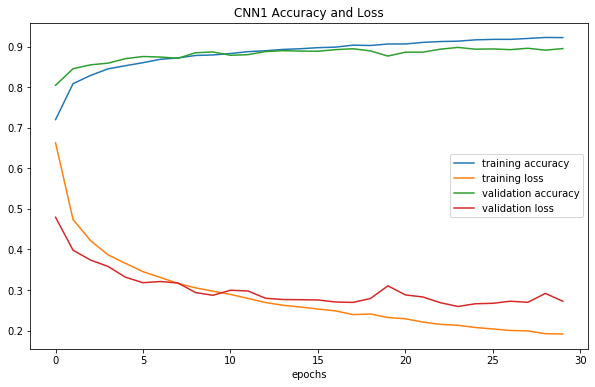

In [5]:
CNN1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
CNN1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN1 = CNN1.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN1.history, 'CNN1')
# gen_csv(CNN1, 'CNN1')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 167us/sample - loss: 0.6734 - accuracy: 0.7329 - val_loss: 1.9945 - val_accuracy: 0.3558
Epoch 2/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.4737 - accuracy: 0.8089 - val_loss: 0.4397 - val_accuracy: 0.8198
Epoch 3/30
48000/48000 [==============================] - 6s 127us/sample - loss: 0.4263 - accuracy: 0.8304 - val_loss: 0.5398 - val_accuracy: 0.7794
Epoch 4/30
48000/48000 [==============================] - 6s 129us/sample - loss: 0.3924 - accuracy: 0.8442 - val_loss: 0.3791 - val_accuracy: 0.8442
Epoch 5/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3696 - accuracy: 0.8526 - val_loss: 0.3502 - val_accuracy: 0.8530
Epoch 6/30
48000/48000 [==============================] - 6s 127us/sample - loss: 0.3490 - accuracy: 0.8614 - val_loss: 0.4814 - val_accuracy: 0.8112
Epoch 7/30
48000/48000 [==========================

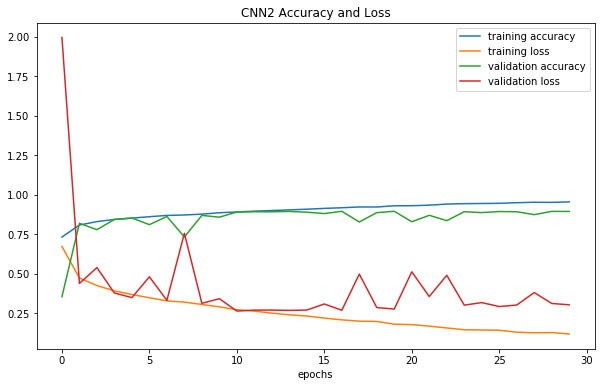

In [7]:
CNN2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN2 = CNN2.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN2.history, 'CNN2')
# gen_csv(CNN2, 'CNN2')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 8, zoom_range = 0.1, shear_range = 0.3, width_shift_range=0.08, height_shift_range=0.08, vertical_flip=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(datagen.flow(X_train, y_train, batch_size = 128), epochs = 40, validation_data = (X_test, y_test), steps_per_epoch=X_train.shape[0] // 128, callbacks = [reduce_lr])
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

  ...
    to  
  ['...']
Train for 375 steps, validate on 12000 samples
Epoch 1/40
375/375 [==============================] - 23s 63ms/step - loss: 0.6649 - accuracy: 0.7512 - val_loss: 0.3261 - val_accuracy: 0.8732
Epoch 2/40
375/375 [==============================] - 21s 55ms/step - loss: 0.5207 - accuracy: 0.7897 - val_loss: 0.3525 - val_accuracy: 0.8547
Epoch 3/40
375/375 [==============================] - 22s 58ms/step - loss: 0.4928 - accuracy: 0.8031 - val_loss: 0.3338 - val_accuracy: 0.8637
Epoch 4/40
375/375 [==============================] - 20s 54ms/step - loss: 0.4783 - accuracy: 0.8084 - val_loss: 0.4013 - val_accuracy: 0.8298
Epoch 5/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4631 - accuracy: 0.8143 - val_loss: 0.6324 - val_accuracy: 0.7389
Epoch 6/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4547 - accuracy: 0.8170 - val_loss: 0.3197 - val_accuracy: 0.8668
Epoch 7/40
375/375 [==============================] - 21s 57ms/s

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 10s 209us/sample - loss: 0.7444 - accuracy: 0.7101 - val_loss: 1.8707 - val_accuracy: 0.3083
Epoch 2/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.5126 - accuracy: 0.7951 - val_loss: 0.6754 - val_accuracy: 0.7340
Epoch 3/40
48000/48000 [==============================] - 8s 169us/sample - loss: 0.4673 - accuracy: 0.8112 - val_loss: 0.6909 - val_accuracy: 0.7222
Epoch 4/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.4335 - accuracy: 0.8274 - val_loss: 0.6116 - val_accuracy: 0.7573
Epoch 5/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.4213 - accuracy: 0.8312 - val_loss: 0.5340 - val_accuracy: 0.7878
Epoch 6/40
48000/48000 [==============================] - 8s 171us/sample - loss: 0.4057 - accuracy: 0.8370 - val_loss: 0.3587 - val_accuracy: 0.8554
Epoch 7/40
48000/48000 [=========================

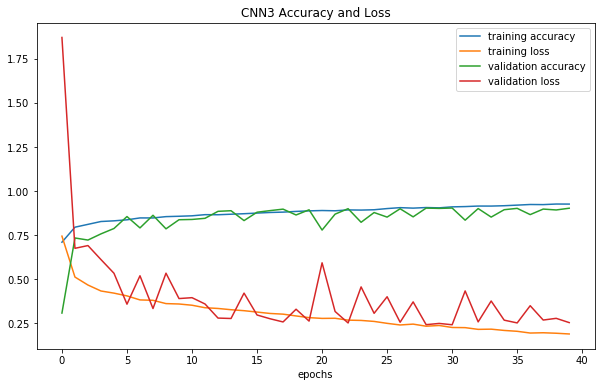

In [8]:
CNN3 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN3 = CNN3.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN3.history, 'CNN3')
# gen_csv(CNN3, 'CNN3')

In [ ]:
CNN4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN4 = CNN4.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN4.history, 'CNN4')
# gen_csv(CNN4, 'CNN4')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 119us/sample - loss: 0.8104 - accuracy: 0.6479 - val_loss: 0.5615 - val_accuracy: 0.7596
Epoch 2/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.5527 - accuracy: 0.7740 - val_loss: 0.4319 - val_accuracy: 0.8213
Epoch 3/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4882 - accuracy: 0.8008 - val_loss: 0.3820 - val_accuracy: 0.8427
Epoch 4/30
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4591 - accuracy: 0.8134 - val_loss: 0.4491 - val_accuracy: 0.8087
Epoch 5/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4313 - accuracy: 0.8248 - val_loss: 0.3909 - val_accuracy: 0.8353
Epoch 6/30
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4197 - accuracy: 0.8295 - val_loss: 0.3865 - val_accuracy: 0.8346
Epoch 7/30
48000/48000 [==========================

In [4]:
models = [Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])]

for model in models:
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()
    time_callback = TimeHistory()
    model.fit(X_train, y_train, epochs = 5, batch_size=128, validation_data = (X_val, y_val), callbacks=[time_callback], verbose=0)
    print(time_callback.times)
    start = time()
    model.evaluate(X_val, y_val, verbose=0)
    print(str(time()-start) + '\n\n')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 693,317
Trainable params: 693,317
Non-trainable params: 0
__________________________________________________

[5.760812997817993, 4.6818013191223145, 4.636094570159912, 4.731291770935059, 4.700864791870117]
1.4328503608703613


